# Tassel cap 
## 1.0.0 vs 2.0.0

Check list:

    [x] compare the two versions in Maps/Terria
    [x] compare the two versions in Explorer
    [x] plot random tiles, check impact of cloud and shadow buffering on no data values. Years 1990, 2010, 2015, 2022.




In [1]:
import datacube
from datacube.utils import masking
import math

import numpy as np

import matplotlib.pyplot as plt
import pandas as pd
import rioxarray as rioxr
import rasterio

import sys
sys.path.insert(1, '../Tools/')
from dea_tools.datahandling import wofs_fuser
from dea_tools.plotting import rgb, plot_wo, display_map

import plotly.graph_objs as go
from plotly.subplots import make_subplots

dc = datacube.Datacube(app="")

In [2]:
# functions

tile_lookup = pd.read_csv('grid_lookup.csv', sep=',', na_values=['NA'])
def lookup_old_value(new_value):
    result = tile_lookup[tile_lookup['new'] == new_value]
    result = result['old'].values[0]
    return result   

def load_tc1(tile, year, percentile):
    wet_measurement = f"wet_pc_{percentile}"
    green_measurement = f"green_pc_{percentile}"
    bright_measurement = f"bright_pc_{percentile}"
    measurements = [wet_measurement, green_measurement, bright_measurement]
    tc1 = dc.load(
        product="ga_ls_tc_pc_cyear_3",
        measurements=measurements,
        time=year,
        region_code=tile,
    )
    tc1_wet = list(tc1.data_vars.values())[0]
    tc1_green = list(tc1.data_vars.values())[1]
    tc1_bright = list(tc1.data_vars.values())[2]
    return tc1_wet, tc1_green, tc1_bright

def load_tc2(tile, year, percentile):
    base_url_wet = "s3://dea-public-data/derivative/ga_ls_tc_pc_cyear_3/2-0-0/{}/{}/{}--P1Y/ga_ls_tc_pc_cyear_3_{}_{}--P1Y_final_wet_pc_{}.tif"         
    base_url_green = "s3://dea-public-data/derivative/ga_ls_tc_pc_cyear_3/2-0-0/{}/{}/{}--P1Y/ga_ls_tc_pc_cyear_3_{}_{}--P1Y_final_green_pc_{}.tif"
    base_url_bright = "s3://dea-public-data/derivative/ga_ls_tc_pc_cyear_3/2-0-0/{}/{}/{}--P1Y/ga_ls_tc_pc_cyear_3_{}_{}--P1Y_final_bright_pc_{}.tif"    
    x_val = tile[:3]
    y_val = tile[-3:]
    url_wet = base_url_wet.format(x_val, y_val, year, tile, year, percentile)
    url_green = base_url_green.format(x_val, y_val, year, tile, year, percentile)
    url_bright = base_url_bright.format(x_val, y_val, year, tile, year, percentile)
    tc2_wet = rioxr.open_rasterio(url_wet)
    tc2_green = rioxr.open_rasterio(url_green)
    tc2_bright = rioxr.open_rasterio(url_bright)
    return tc2_wet, tc2_green, tc2_bright

def plot_rgb_comparison(tile, year, percentile):
    
    print(tile)
    
    old_tile = lookup_old_value(tile)
    percentile = percentile
    tc1_wet, tc1_green, tc1_bright = load_tc1(old_tile, year, percentile)
    tc2_wet, tc2_green, tc2_bright = load_tc2(tile, year, percentile)
    
    # squeeze the data arrays
    g_channel_v3 = tc1_wet.squeeze()
    r_channel_v3 = tc1_green.squeeze()
    b_channel_v3 = tc1_bright.squeeze()

    g_channel_v4 = tc2_wet.squeeze()
    r_channel_v4 = tc2_green.squeeze()
    b_channel_v4 = tc2_bright.squeeze()

    # stack them along a new dimension to create RGB images
    rgb_stack_v3 = np.stack([r_channel_v3, g_channel_v3, b_channel_v3], axis=-1)
    rgb_stack_v4 = np.stack([r_channel_v4, g_channel_v4, b_channel_v4], axis=-1)
    
    # normalise the values to range between 0 and 1
    rgb_normalized_v3 = rgb_stack_v3 #/ 255.0  
    rgb_normalized_v4 = rgb_stack_v4 #/ 255.0  

    # count the number of no-data values (255) in each dataset
    no_data_count_v3 = np.sum(np.any(rgb_stack_v3 == -9999, axis=-1))
    no_data_count_v4 = np.sum(np.any(rgb_stack_v4 == -9999, axis=-1))

    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(20, 10))

    # Plot the RGB image for version 3
    axes[0].imshow(rgb_normalized_v3)
    axes[0].set_title(f"TC - Version 1\nNo Data (-9999) Count: {no_data_count_v3:,}")
    axes[0].axis('off')  # Optional: turn off the axis

    # Plot the RGB image for version 4
    axes[1].imshow(rgb_normalized_v4)
    axes[1].set_title(f"TC - Version 2\nNo Data (-9999) Count: {no_data_count_v4:,}")
    axes[1].axis('off')  # Optional: turn off the axis

    # Show the plot
    plt.show()


In [3]:
tiles = ['x33y34', 'x43y51', 'x49y39', 'x58y52', 'x66y36', 'x56y32', 'x58y22']

x33y34


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


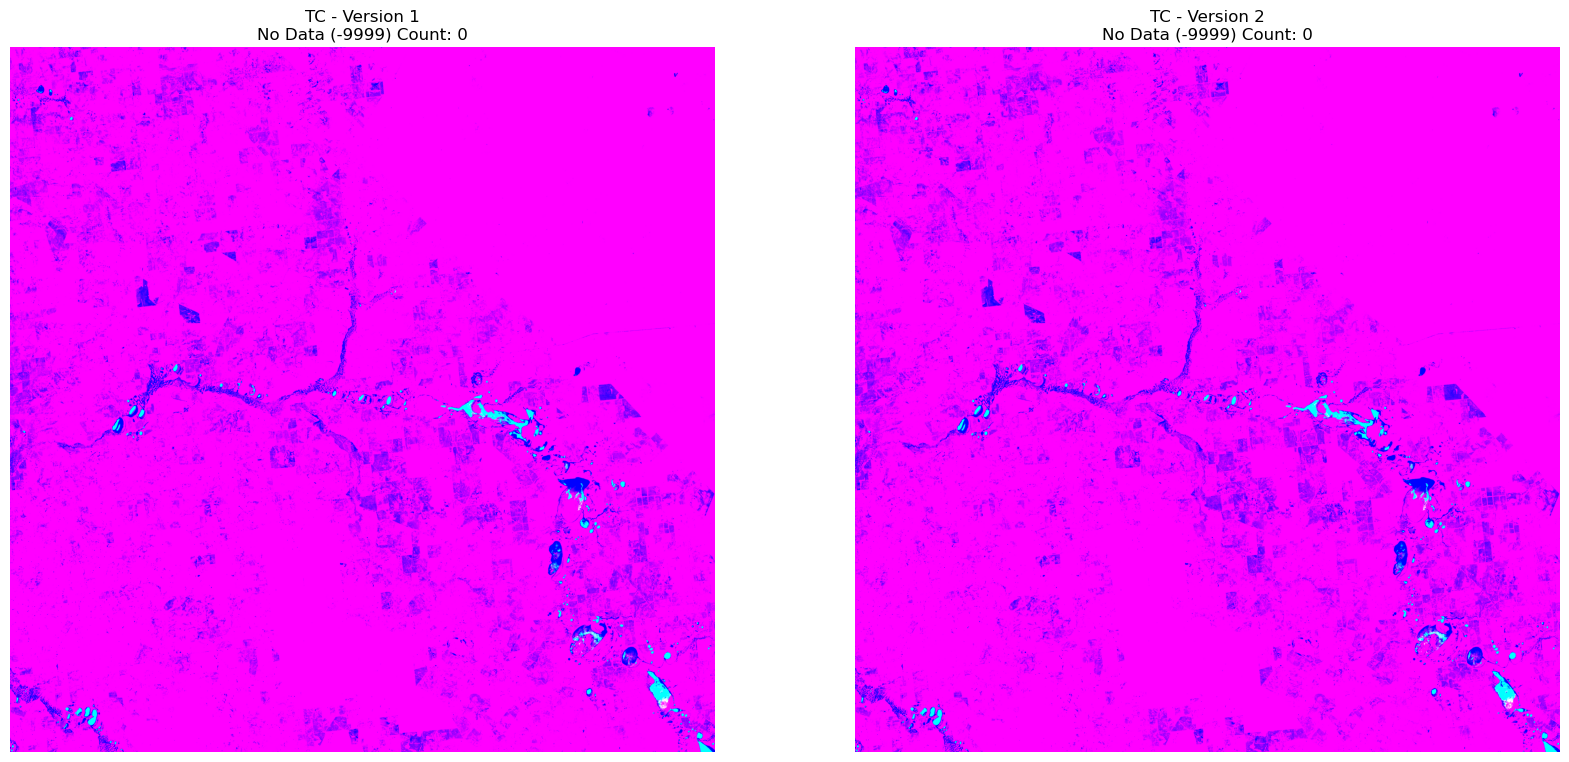

x43y51


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


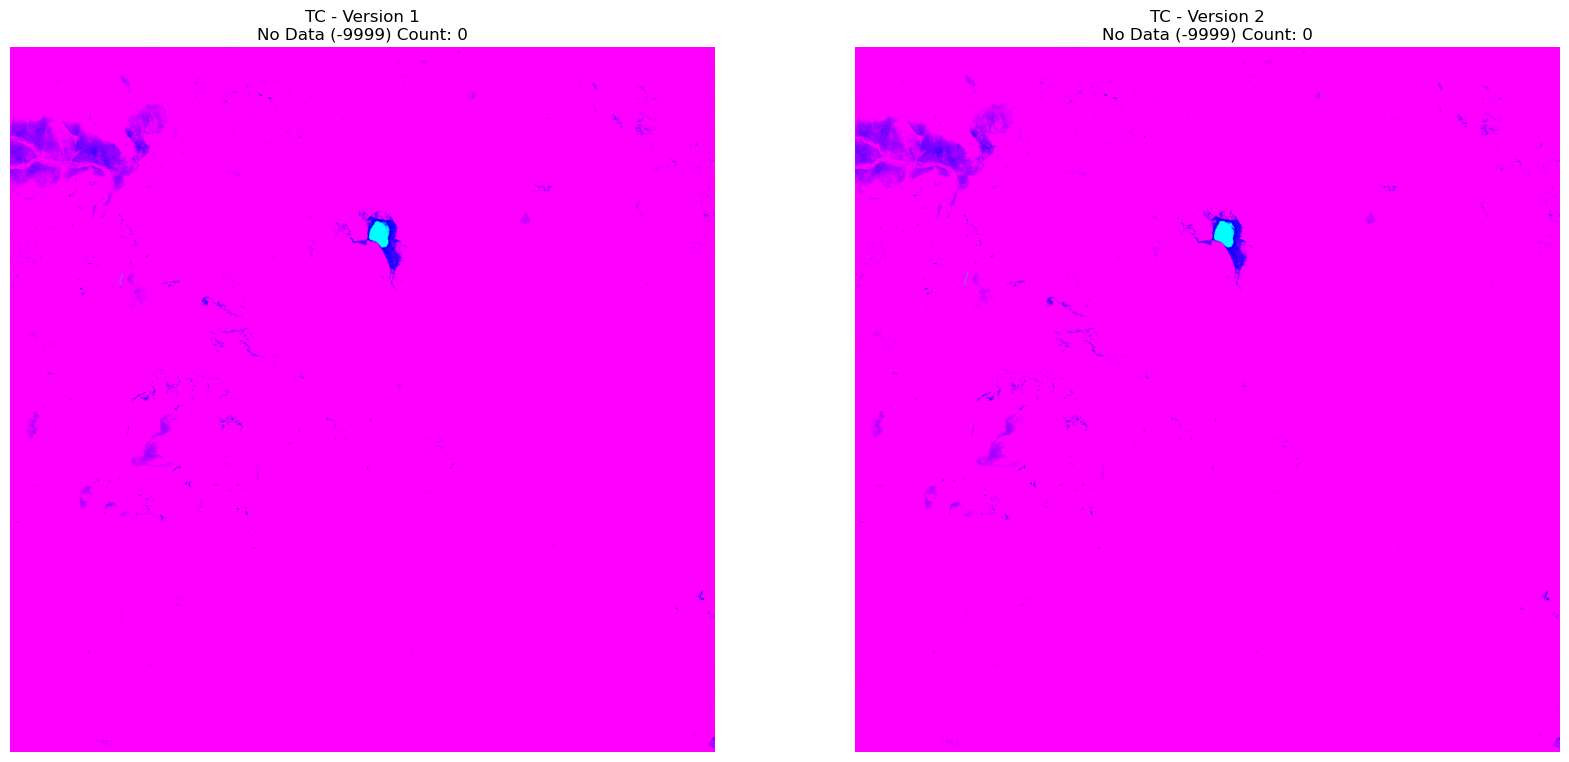

x49y39


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


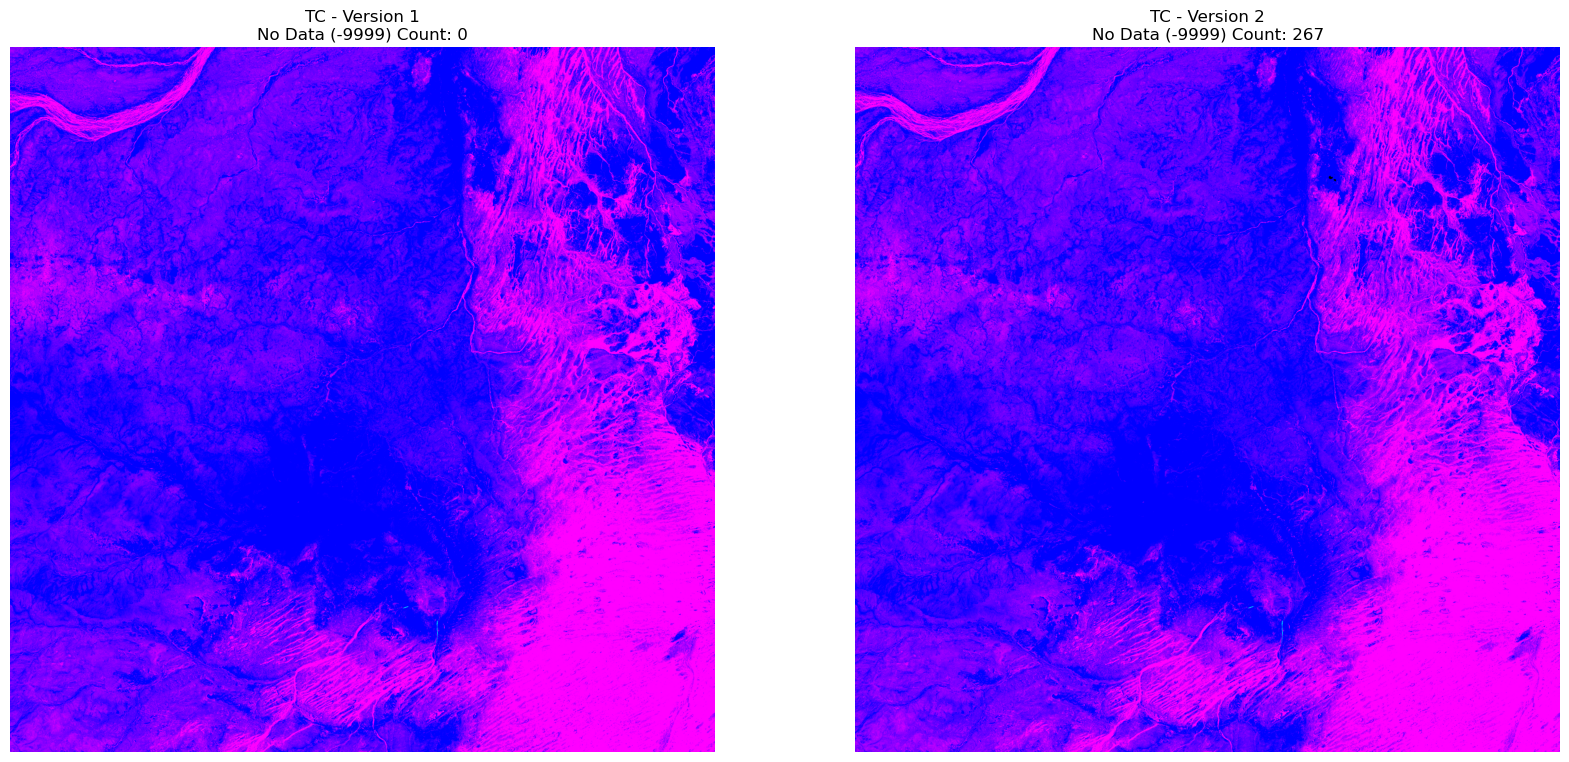

x58y52


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


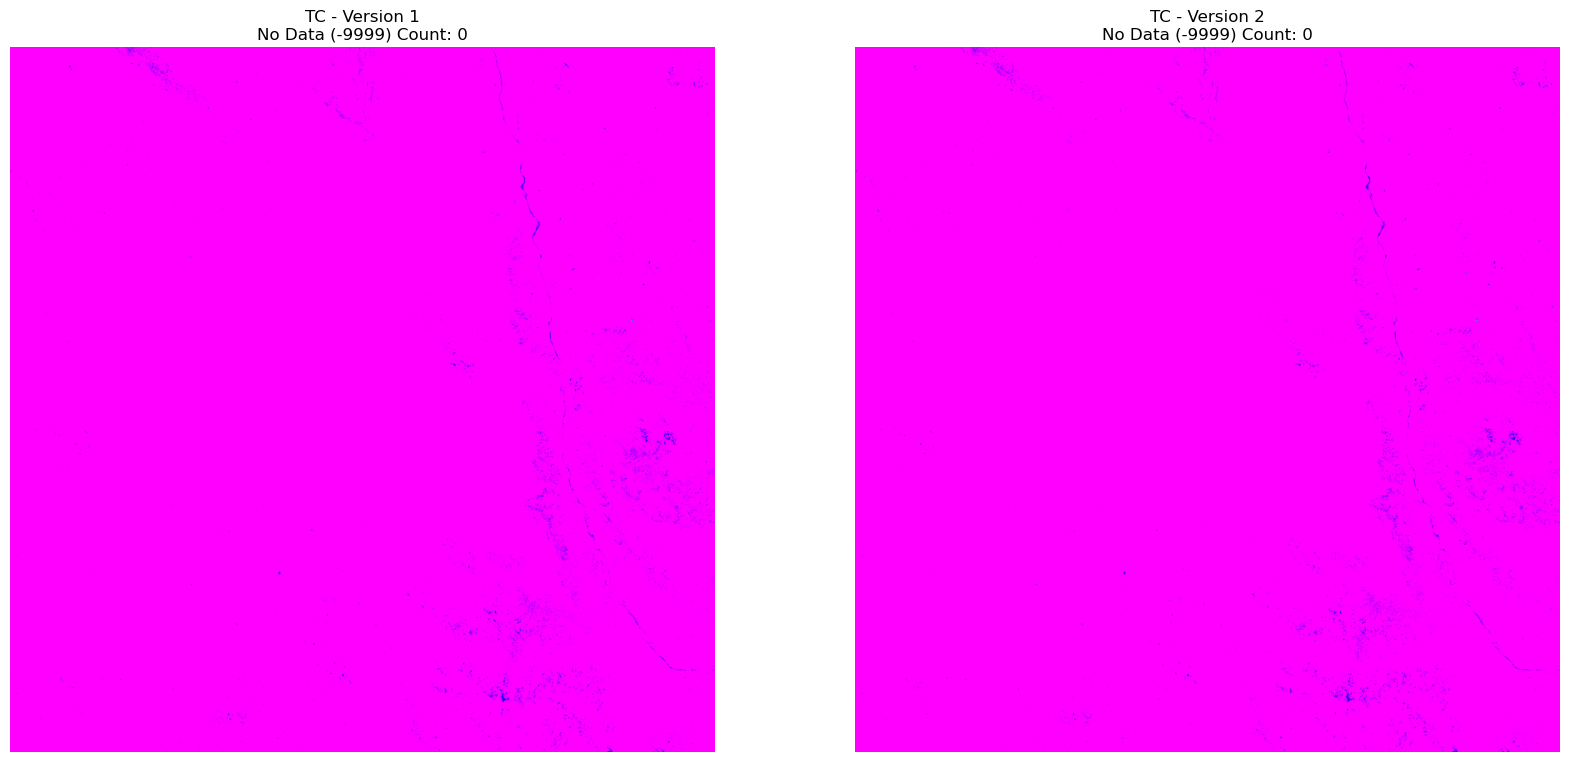

x66y36


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


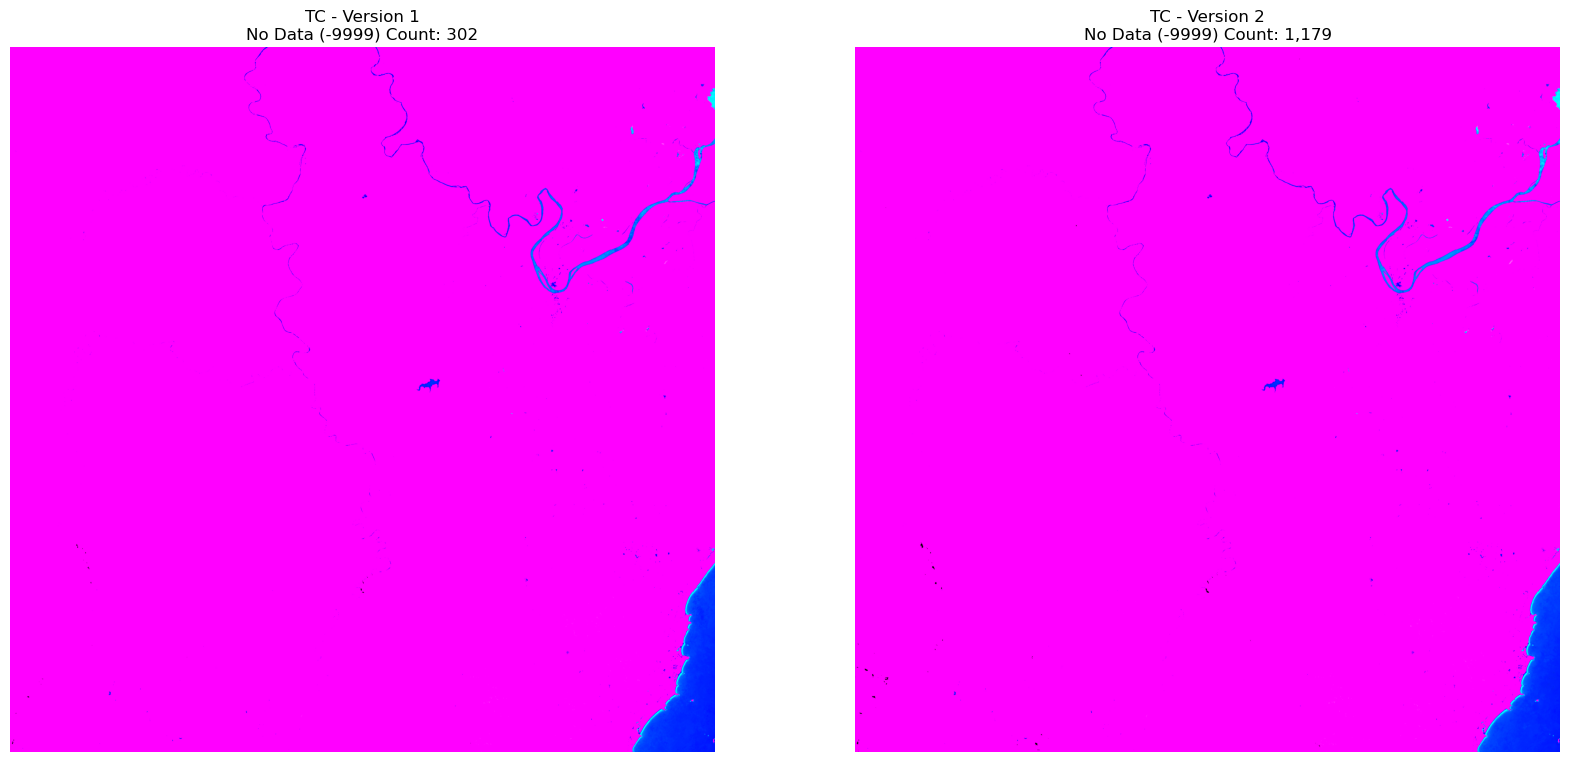

x56y32


In [ ]:
for tile in tiles:
    plot_rgb_comparison(tile, '2015', '50')

In [ ]:
for tile in tiles:
    plot_rgb_comparison(tile, '2015', '10')

In [ ]:
for tile in tiles:
    plot_rgb_comparison(tile, '2015', '90')

In [ ]:
for tile in tiles:
    plot_rgb_comparison(tile, '2010', '10')

In [ ]:
for tile in tiles:
    plot_rgb_comparison(tile, '2010', '50')

In [ ]:
for tile in tiles:
    plot_rgb_comparison(tile, '2010', '90')

In [ ]:
for tile in tiles:
    plot_rgb_comparison(tile, '2022', '10')

In [ ]:
for tile in tiles:
    plot_rgb_comparison(tile, '2022', '50')

In [ ]:
for tile in tiles:
    plot_rgb_comparison(tile, '2022', '90')

In [ ]:
for tile in tiles:
    plot_rgb_comparison(tile, '1990', '10')

In [ ]:
for tile in tiles:
    plot_rgb_comparison(tile, '1990', '50')

In [ ]:
for tile in tiles:
    plot_rgb_comparison(tile, '1990', '90')